┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

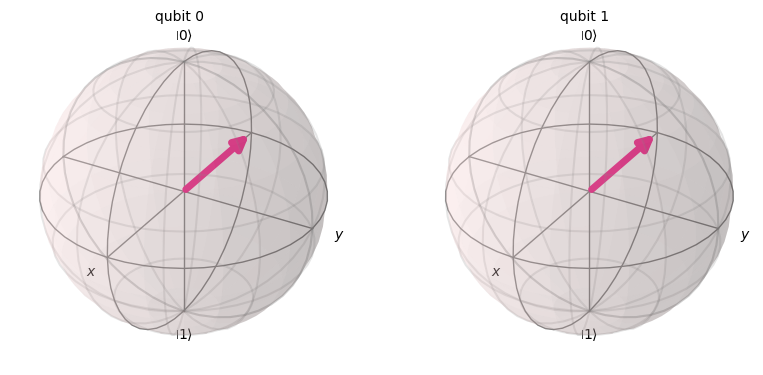

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing Qiskit
from qiskit import transpile, assemble
from qiskit_aer import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
#WITH PHASE KICKBACK
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
display(qc.draw())

# Use Aer simulator backend
usim = Aer.get_backend('aer_simulator')
qc.save_statevector()
# Transpile the circuit for the simulator
transpiled_q = transpile(qc, usim)

# Run the circuit on the unitary simulator backend
job_sim = usim.run(transpiled_q)
result_sim = job_sim.result()

# result
final_state = result_sim.get_statevector(transpiled_q)
#display

array_to_latex(final_state, prefix="\\text{Statevector = }")  # this will create an entangled state !
plot_bloch_multivector(final_state)
#WE CAN SEE THAT THE QUBIT 0 WAS FLIPPED INSTEAD OF QUBIT 1 , HENCE PHASE KICKBACK

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

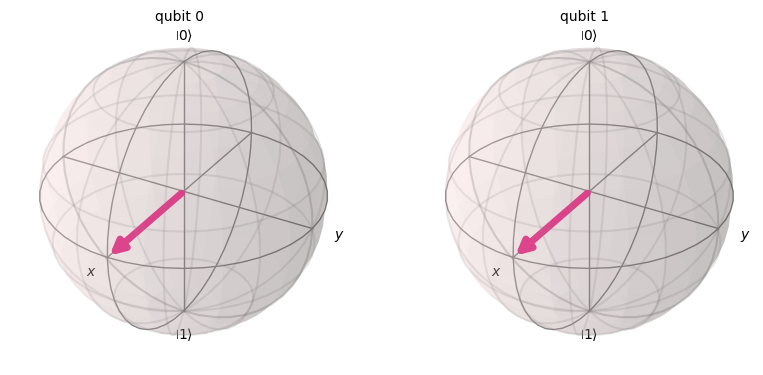

In [13]:
#WITHOUT PHASE KICKBACK
q2=QuantumCircuit(2)
q2.h(0)
q2.h(1)
q2.cx(0,1)
display(q2.draw())

# Use Aer simulator backend
usim = Aer.get_backend('aer_simulator')
q2.save_statevector()
# Transpile the circuit for the simulator
transpiled_q2 = transpile(q2, usim)

# Run the circuit on the unitary simulator backend
job_sim = usim.run(transpiled_q2)
result_sim = job_sim.result()

# result
final_state = result_sim.get_statevector(transpiled_q2)
#display

array_to_latex(final_state, prefix="\\text{Statevector = }")  # this will create an entangled state !
plot_bloch_multivector(final_state)
#OVER HERE WE GET THE EXPECTED RESULT, BOTH QUBITS STARTING AT ZERO THEN NORMALIZED TO EQUATOR, TARGET BIT IS FLIPPED.